# **Importing necessary Packages**

In [ ]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.models import load_model

# **Loading the dataset**

In [ ]:
def load_doc(filename):
	file = open(filename, 'r')
	text = file.read()
	file.close()
	return text
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	for line in doc.split('\n'):
		if len(line) < 1:
			continue
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# **Cleaning the dataset**

In [ ]:
def load_clean_descriptions(filename, dataset):
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		tokens = line.split()
		image_id, image_desc = tokens[0], tokens[1:]
		if image_id in dataset:
			if image_id not in descriptions:
				descriptions[image_id] = list()
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			descriptions[image_id].append(desc)
	return descriptions

# **Loading photo features**

In [ ]:
def load_photo_features(filename, dataset):
	all_features = load(open(filename, 'rb'))
	features = {k: all_features[k] for k in dataset}
	return features

# **Tokenizing and other Preprocessing**

In [ ]:
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None


# **Generation of a description for an image**

In [ ]:
def generate_desc(model, tokenizer, photo, max_length):
	in_text = 'startseq'
	for i in range(max_length):
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		yhat = argmax(yhat)
		word = word_for_id(yhat, tokenizer)
		if word is None:
			break
		in_text += ' ' + word
		if word == 'endseq':
			break
	return in_text

# **Model Evaluation**

In [ ]:
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	for key, desc_list in descriptions.items():
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# **Invoking the functions and generating results**

In [ ]:
filename = '/content/drive/MyDrive/UB assignments/DIC/model-ep017-loss2.641-val_loss4.644.h5'
model = load_model(filename)

In [ ]:
filename = '/content/drive/MyDrive/UB assignments/DIC/Flickr8k_text/Flickr_8k.trainImages.txt'

train = load_set(filename)


train_descriptions = load_clean_descriptions('/content/drive/MyDrive/UB assignments/DIC/descriptions.txt', train)


tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1

max_length = max_length(train_descriptions)
filename = '/content/drive/MyDrive/UB assignments/DIC/Flickr8k_text/Flickr_8k.testImages.txt'
test = load_set(filename)

# descriptions
test_descriptions = load_clean_descriptions('/content/drive/MyDrive/UB assignments/DIC/descriptions.txt', test)

# photo features
test_features = load_photo_features('/content/drive/MyDrive/UB assignments/DIC/features.pkl', test)
print('Photos: test=%d' % len(test_features))

Photos: test=1000


# **Loading the model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Evaluating the model**

In [ ]:
filename = '/content/drive/MyDrive/UB assignments/DIC/dl_model.h5'
model = load_model(filename)
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-1: 0.028743
BLEU-2: 0.169537
BLEU-3: 0.344793
BLEU-4: 0.411749


# **Creating a tokenizer**

In [ ]:
from keras.preprocessing.text import Tokenizer
from pickle import dump

def load_doc(filename):
	file = open(filename, 'r')
	text = file.read()
	file.close()
	return text

def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	for line in doc.split('\n'):
		if len(line) < 1:
			continue
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

def load_clean_descriptions(filename, dataset):
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		tokens = line.split()
		image_id, image_desc = tokens[0], tokens[1:]
		if image_id in dataset:
			if image_id not in descriptions:
				descriptions[image_id] = list()
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			descriptions[image_id].append(desc)
	return descriptions

def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

filename = '/content/drive/MyDrive/UB assignments/DIC/Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
train_descriptions = load_clean_descriptions('/content/drive/MyDrive/UB assignments/DIC/descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
tokenizer = create_tokenizer(train_descriptions)
dump(tokenizer, open('/content/drive/MyDrive/UB assignments/DIC/Flicker8k_Dataset/tokenizer.pkl', 'wb'))

Dataset: 6000
Descriptions: train=6000


In [ ]:
tokenizer = load(open('/content/drive/MyDrive/UB assignments/DIC/Flicker8k_Dataset/tokenizer.pkl', 'rb'))
max_length = 34

In [ ]:
model = load_model('/content/drive/MyDrive/UB assignments/DIC/dl_model.h5')

# **Extracting Image features**

In [ ]:
def extract_features(filename):
	model = VGG16()
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	image = load_img(filename, target_size=(224, 224))
	image = img_to_array(image)
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	image = preprocess_input(image)
	feature = model.predict(image, verbose=0)
	return feature

photo = extract_features('/content/drive/MyDrive/UB assignments/DIC/example4.jpg')

553476096/553467096 [==============================] - 5s 0us/step


# **Generating the caption for one of the Images**

In [ ]:
tokenizer = load(open('/content/drive/MyDrive/UB assignments/DIC/Flicker8k_Dataset/tokenizer.pkl', 'rb'))
max_length = 34
model = load_model('/content/drive/MyDrive/UB assignments/DIC/model-ep017-loss2.641-val_loss4.644.h5')
photo = extract_features('/content/drive/MyDrive/UB assignments/DIC/example4.jpg')
description = generate_desc(model, tokenizer, photo, max_length)
print(description)

startseq man stands at the sunset endseq


In [ ]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.models import load_model
def extract_features(filename):
	model = VGG16()
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

	image = load_img(filename, target_size=(224, 224))
	image = img_to_array(image)
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	image = preprocess_input(image)
	feature = model.predict(image, verbose=0)
	return feature

def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

def generate_desc(model, tokenizer, photo, max_length):
	in_text = 'startseq'
	for i in range(max_length):
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		sequence = pad_sequences([sequence], maxlen=max_length)
		yhat = model.predict([photo,sequence], verbose=0)
		yhat = argmax(yhat)
		word = word_for_id(yhat, tokenizer)
		if word is None:
			break
		in_text += ' ' + word
		if word == 'endseq':
			break
	return in_text

tokenizer = load(open('/content/drive/MyDrive/UB assignments/DIC/Flicker8k_Dataset/tokenizer.pkl', 'rb'))
max_length = 34
model = load_model('/content/drive/MyDrive/UB assignments/DIC/model-ep017-loss2.641-val_loss4.644.h5')
photo = extract_features('/content/drive/MyDrive/UB assignments/DIC/example4.jpg')

In [ ]:
description = generate_desc(model, tokenizer, photo, max_length)
description1 = description.replace('startseq', '')
generated_caption = description1.replace('endseq', '')
print(generated_caption)

 man stands at the sunset 


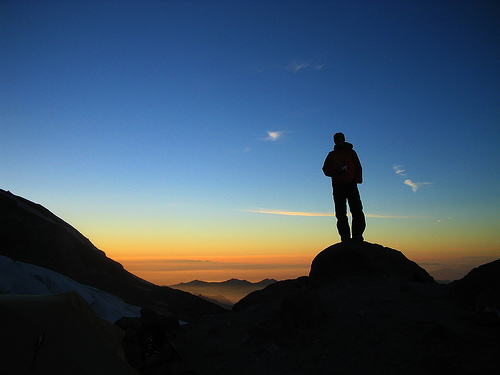

In [ ]:
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/UB assignments/DIC/example4.jpg'))
#Input Image

In [ ]:
print(generated_caption)

 man stands at the sunset 
